## Fit a function with PyTorch Backpropagation



Let's pick a simple function $y$ defined as $y = 2x$ and generate a sample data:



In [1]:
from pylab import *
import pandas as pd
import torch
from torch.autograd import Variable

#Create sample data
x = [1.0, 2.0, 3.0]
y = [2*xx for xx in x]

Notice that we are setting True on the ``requires_grad`` parameter. In Pytorch, each tensor has this parameter available since this enable to track the gradients across the network. Here it's in-depth explanation of what requires_grad enables: https://www.youtube.com/watch?v=MswxJw-8PvE

In [3]:
w = Variable(torch.Tensor([1.0]),  requires_grad=True)  # Any random value for weights
print("Random initial value for w:", w.data[0])

data = {'x':x, 'y':y}
df = pd.DataFrame(data=data, index=x)
print("Training Data:")
df

Random initial value for w: tensor(1.)
Training Data:


,x,y
1.0,1.0,2.0
2.0,2.0,4.0
3.0,3.0,6.0


Now let's pretend we don't know the generating function $y$. All we know
about it is that $y$ is a linear function. So we can write it as:

$$y_{pred} = w*x$$



In [4]:
# our model forward pass
# this is actually our y_pred as we defined above
def forward(x):
    return x * w

**Goal**: use the training data above to find the parameter $w$.

**Solution:** Loss function for our problem is:  $loss(w) = (y_{pred}-y)^2$

Remembering the definition of $y_{pred} = w*x$ we can rewrite the loss function as $loss(w) = ( w*x-y)^2$



In [5]:
# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

To minimize the loss, we should compute the derivative of loss wrt $w$
and interatively change $w$ to move in the direction of the descent:

![img](http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif "alt text")

Derivative of loss with respect to $w$ is automatically computed by
PyTorch using *autograd* and will be kept automatically in

    w.grad.data

before we start training let's see how our predictions look with the
arbitrary weight $w=1$



In [6]:
# predict the value of the predicted function at x = 4 before training
# Before training
print("predict (before training)")
print("input: 4")
print("model prediction (before training): ", forward(4).data[0], " -- correct answer: 2x4 = 8")

predict (before training)
input: 4
model prediction (before training):  tensor(4.)  -- correct answer: 2x4 = 8


##### Visualize training data vs predicted function values, before training:



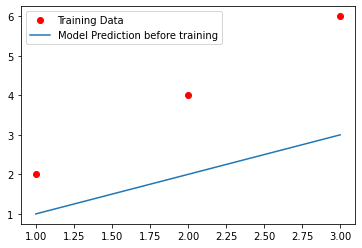

In [7]:
x_data = df['x']
y_data = df['y']
plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction before training")
legend()

That's pretty bad! Let's learn the predicting function $y_pred$ by
learning the value of $w$.

We will move $w$ according to this rule: $w = w - learning\_rate * grad$

where

    grad = w.grad.data[0]

Remember in Pytorch we can call the ``.backward()`` method on tensors and take the derivative with respect of every parameter which has ``requires_grad = True`` 

Let's pick a small step size as our learning rate:

$learning\_rate = 0.01$

and solve the problem using gradient descent in 10 iterations:

In [10]:
learning_rate = 0.01

# Training loop
for epoch in range(10): #n_epochs (aka iterations) are 10
    for x_val, y_val in zip(x_data, y_data):
        #compute loss for this step
        l = loss(x_val, y_val)
        #backprop
        l.backward() 
        # grad is automatically computed
        print("\tgrad: ", x_val, y_val, w.grad.data[0])
        # alter w for this step 
        w.data = w.data - learning_rate * w.grad.data

        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

    print("progress:", epoch, l.data[0])

	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progress: 7 tensor(0.1066)
	grad:  1.0 2.0 te

#### Let's see how well we are doing in prediction a single value of the function after training for 10 steps:

In [11]:
# After training
print("predict (after training)")
print("input: 4")
print("model prediction (after training): ", forward(4).data[0], " -- correct answer: 8")

predict (after training)
input: 4
model prediction (after training):  tensor(7.8049)  -- correct answer: 8


#### Looks really promising! Let's look at the predicted function over all values in the training range:



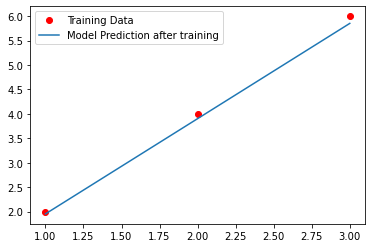

In [12]:
plot(x_data,y_data,'ro', label="Training Data")
plot(x_data,[forward(x) for x in x_data], label="Model Prediction after training")
legend()

Hoorray! We have learned the desired function at a pretty good accuracy!



In [13]:
print("Learned function:")
print("y_pred = %f * x"%w )

Learned function:
y_pred = 1.951216 * x


## Exercise I:



Repeat the above exercise for

$y = x^2$



## Exercise II:



Use the above method for

$y = 5x+3$

**Hint:** You need to learn two values: $w$ and $b$. And your prediction
function is

$y_{pred} = w*x + b$

and your gradient descent looks something like this:

![img](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif "alt text")

